In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('../../tradelog_IS_all_trades_validhours_ts40.csv', index_col = 0)

In [349]:
df['open_time_fmt'] = pd.to_datetime(df['open_time']).dt.time

In [350]:
# df = df[df['open_time']> '2023-05-31']

Text(20.75, 125, 'Sydney Open')

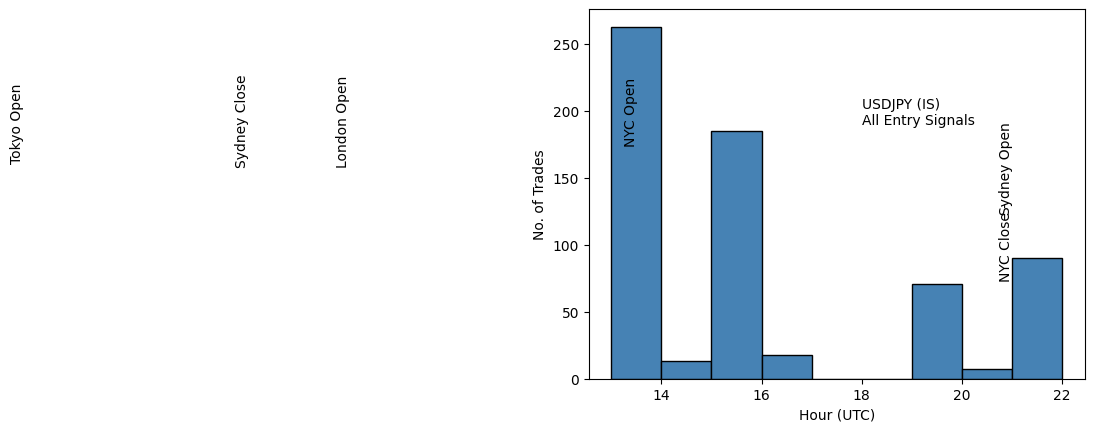

In [351]:
data = pd.to_datetime(df['open_time']).dt.hour
bin_width = 1
bins = np.arange(min(data), max(data) + bin_width, bin_width)
plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = bins, color='steelblue', edgecolor = 'black')


plt.xlabel('Hour (UTC)')
plt.ylabel('No. of Trades')
plt.text(18,190,'USDJPY (IS)\nAll Entry Signals')
plt.text(1,163,'Tokyo Open', rotation = 90)
plt.text(5.5,160,'Sydney Close', rotation = 90)
plt.text(7.5,160,'London Open', rotation = 90)
plt.text(13.25,176,'NYC Open', rotation = 90)
plt.text(20.75,75,'NYC Close -', rotation = 90)
plt.text(20.75,125,'Sydney Open', rotation = 90)

In [352]:
df['time_in_trade'] = (pd.to_datetime(df['close_time']) - pd.to_datetime(df['open_time']))/pd.Timedelta(hours = 1)
print('mode: ',df['time_in_trade'].mode())
print('mean: ',df['time_in_trade'].mean())
print('median: ',df['time_in_trade'].median())
# plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = 24)

mode:  0    40.0
Name: time_in_trade, dtype: float64
mean:  29.60110767645544
median:  25.166666666666668


Text(150, 130, 'USDJPY (IS)\nAll Entry Signals')

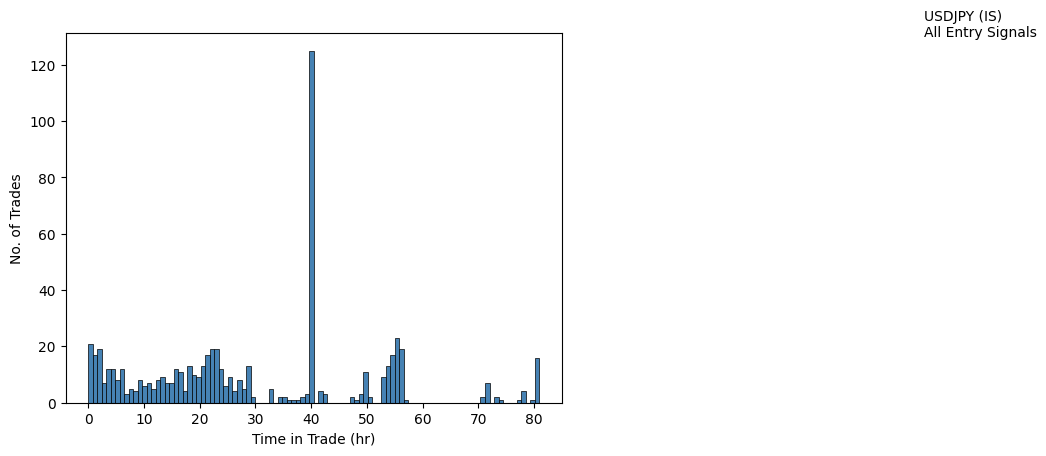

In [353]:
plt.hist(df['time_in_trade'], bins = 100,color='steelblue', edgecolor = 'black',linewidth = 0.5)
plt.xlabel('Time in Trade (hr)')
plt.ylabel('No. of Trades')
plt.text(150,130,'USDJPY (IS)\nAll Entry Signals')


In [354]:
hourly_summary = pd.DataFrame(index = [i for i in range(24)],columns = ['win_rate', 'PnL', 'no_trades','av_time_in_trade_wins', 'av_time_in_trade_losses', 'av_R'])



In [355]:
import numpy as np
import math as m
band = 1

for h in hourly_summary.index:
    # print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]

    dg['entry'] = np.where(dg['dir'].astype(float) ==1 ,dg['open_price'].apply(lambda x: m.floor(x)), dg['open_price'].apply(lambda x: m.ceil(x)) )
    # print(dg['entry'])
    
    dg['R'] = ((dg['entry'] + band*dg['dir'])  - dg['open_price'])/(dg['open_price'] - (dg['entry'] - band*dg['dir']))
    
    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    
    de = dg[dg['PnL']>0]
    db = dg[dg['PnL']<0]
    
    PnL = dg['PnL'].sum()
    dg

    if no_trades == 0:
        hourly_summary.loc[h,'win_rate'] = 0
    else:
        hourly_summary.loc[h,'win_rate'] = wins/no_trades
    
    hourly_summary.loc[h,'PnL']     = PnL
    hourly_summary.loc[h,'no_trades'] = no_trades

    hourly_summary.loc[h,'av_time_in_trade_wins'] = de['time_in_trade'].median()
    hourly_summary.loc[h,'av_time_in_trade_losses'] = db['time_in_trade'].median()
    hourly_summary.loc[h,'av_R'] = dg['R'].mean()



for h in hourly_summary.index:
    # print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]
    no_trades = len(dg)
    hourly_summary.loc[h,'prob_hr']     =  no_trades/hourly_summary['no_trades'].sum()
    hourly_summary.loc[h,'EV_hr']       = hourly_summary.loc[h,'prob_hr']*hourly_summary.loc[h,'PnL']





/var/folders/8t/m0nq83vd5l361mq6g6xqbjwh0000gp/T/ipykernel_23387/3037661767.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['entry'] = np.where(dg['dir'].astype(float) ==1 ,dg['open_price'].apply(lambda x: m.floor(x)), dg['open_price'].apply(lambda x: m.ceil(x)) )
/var/folders/8t/m0nq83vd5l361mq6g6xqbjwh0000gp/T/ipykernel_23387/3037661767.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['R'] = ((dg['entry'] + band*dg['dir'])  - dg['open_price'])/(dg['open_price'] - (dg['entry'] - band*dg['dir'

In [356]:
hourly_summary['break_even_wr%'] = 1./(1. + hourly_summary['av_R'])

In [357]:
hourly_summary

,win_rate,PnL,no_trades,av_time_in_trade_wins,av_time_in_trade_losses,av_R,prob_hr,EV_hr,break_even_wr%
0,0,0.0,0,NaN,NaN,NaN,0.000000,0.000000,NaN
1,0,0.0,0,NaN,NaN,NaN,0.000000,0.000000,NaN
2,0,0.0,0,NaN,NaN,NaN,0.000000,0.000000,NaN
3,0,0.0,0,NaN,NaN,NaN,0.000000,0.000000,NaN
4,0,0.0,0,NaN,NaN,NaN,0.000000,0.000000,NaN
5,0,0.0,0,NaN,NaN,NaN,0.000000,0.000000,NaN
6,0,0.0,0,NaN,NaN,NaN,0.000000,0.000000,NaN
7,0,0.0,0,NaN,NaN,NaN,0.000000,0.000000,NaN
8,0,0.0,0,NaN,NaN,NaN,0.000000,0.000000,NaN
9,0,0.0,0,NaN,NaN,NaN,0.000000,0.000000,NaN


<BarContainer object of 24 artists>

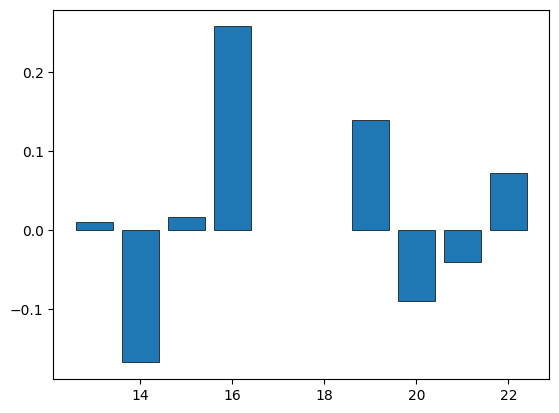

In [358]:
plt.bar(hourly_summary.index,hourly_summary['win_rate'] - hourly_summary['break_even_wr%'],edgecolor = 'black',linewidth = 0.5 )

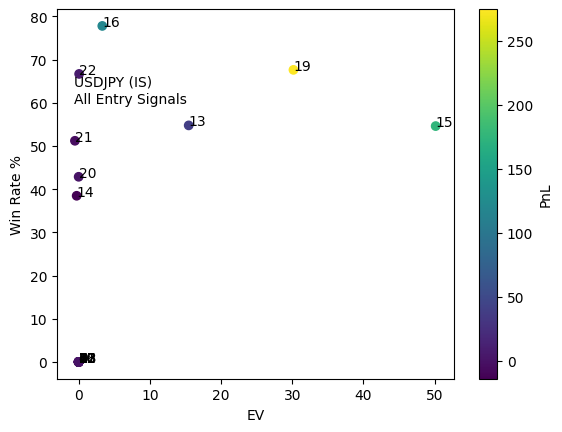

In [359]:
g = plt.scatter(x=hourly_summary['EV_hr'], y = 100*hourly_summary['win_rate'],c=hourly_summary['PnL'])

for i in hourly_summary.index:
    plt.text(hourly_summary.loc[i,'EV_hr'], 100*hourly_summary.loc[i,'win_rate'],i)


plt.xlabel('EV')
plt.ylabel('Win Rate %')
plt.text(-0.7,60,'USDJPY (IS)\nAll Entry Signals')
colorbar = plt.colorbar(g)
colorbar.set_label('PnL')


23


Text(0, 0.5, 'no. trades')

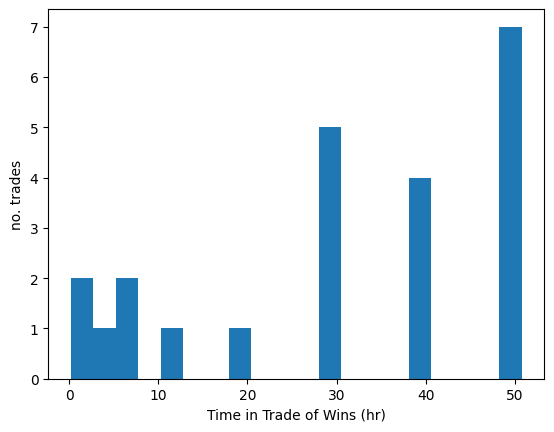

In [360]:
hour = 19
dh = df[pd.to_datetime(df['open_time']).dt.hour == hour]
dh = dh[dh['PnL']<0]
print(len(dh))
plt.hist(dh['time_in_trade'],bins = 20)

plt.xlabel('Time in Trade of Wins (hr)')
plt.ylabel('no. trades')
# plt.text(-0.7,60,'USDJPY (IS)\nAll Entry Signals')


Text(18, 1.1, 'USDJPY (IS)\nAll Entry Signals')

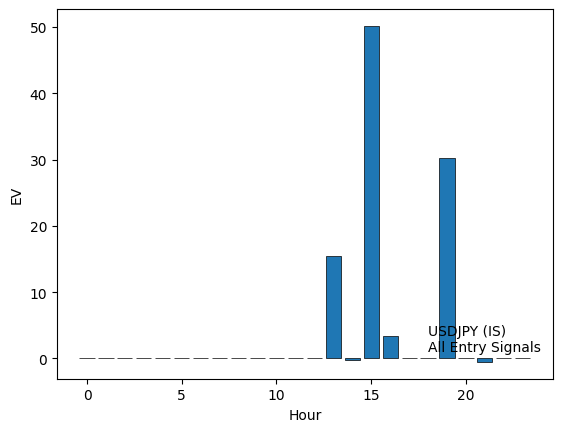

In [361]:
plt.bar(hourly_summary.index,hourly_summary['EV_hr'],edgecolor = 'black',linewidth = 0.5 )
plt.xlabel('Hour')
plt.ylabel('EV')
plt.text(18,1.1,'USDJPY (IS)\nAll Entry Signals')

In [362]:
int(df['time_in_trade'].max())

80

In [363]:

time_in_trade_summary = pd.DataFrame(index = [i for i in range(int(df['time_in_trade'].max()+1)) ], columns = ['win_rate','PnL','no_trades','prob','EV(t)'])

for h in time_in_trade_summary.index:
    # print(h)
    dg = df[df['time_in_trade'].astype(int) == h]
    # print(dg)

    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    PnL = dg['PnL'].sum()

    if no_trades == 0:
        time_in_trade_summary.loc[h,'win_rate'] = 0
    else:
        time_in_trade_summary.loc[h,'win_rate'] = wins/no_trades
    
    time_in_trade_summary.loc[h,'PnL']     = PnL
    time_in_trade_summary.loc[h,'no_trades'] = no_trades
    

for h in time_in_trade_summary.index:
    no_trades = time_in_trade_summary.loc[h,'no_trades']
    time_in_trade_summary.loc[h,'prob'] = no_trades/time_in_trade_summary['no_trades'].sum()

for h in time_in_trade_summary.index:
    dg = time_in_trade_summary[time_in_trade_summary.index >= h]
    time_in_trade_summary.loc[h,'EV(t)'] = (dg['prob']*dg['PnL']).sum()

In [364]:
t = time_in_trade_summary[time_in_trade_summary['no_trades']!= 0]
time_in_trade_summary.head(20)

,win_rate,PnL,no_trades,prob,EV(t)
0,0.758621,80.47022,29,0.044822,24.341567
1,0.733333,65.891517,15,0.023184,20.73471
2,0.588235,20.606908,17,0.026275,19.207086
3,0.461538,-47.275327,13,0.020093,18.665637
4,0.666667,44.279321,15,0.023184,19.615528
5,0.6875,30.397292,16,0.02473,18.58896
6,0.25,-15.917279,4,0.006182,17.837249
7,0.833333,66.130111,6,0.009274,17.935656
8,0.5,-2.17569,6,0.009274,17.322394
9,0.571429,1.845889,7,0.010819,17.34257


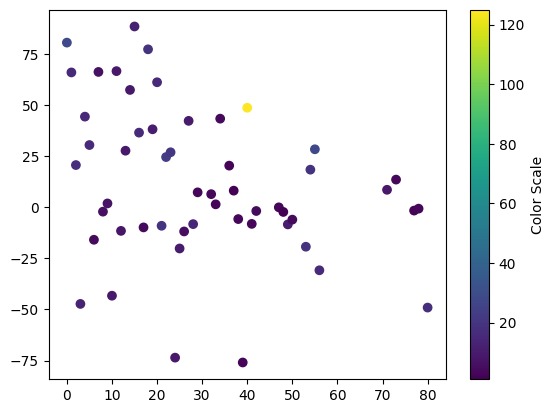

In [365]:
fig = plt.scatter(t.index,t['PnL'],c = t['no_trades'])
colorbar = plt.colorbar(fig)
colorbar.set_label('Color Scale')

<BarContainer object of 60 artists>

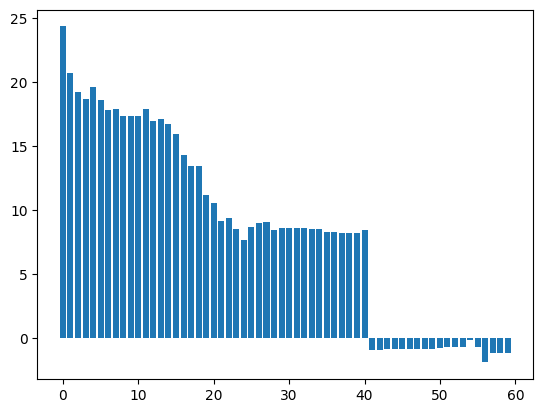

In [366]:
plt.bar(time_in_trade_summary.head(60).index,time_in_trade_summary['EV(t)'].head(60))

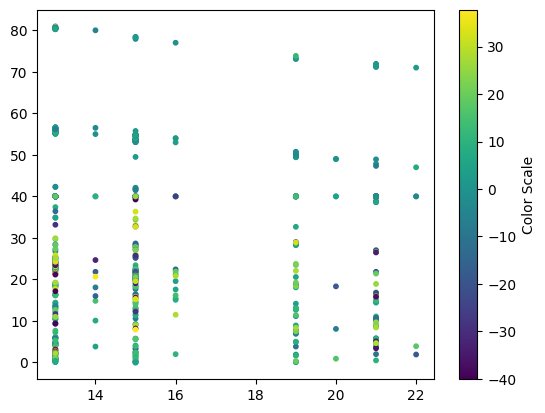

In [367]:
f =plt.scatter(pd.to_datetime(df['open_time']).dt.hour, df['time_in_trade'], s = 10,c = df['PnL'], marker= 'o')
colorbar = plt.colorbar(f)
colorbar.set_label('Color Scale')

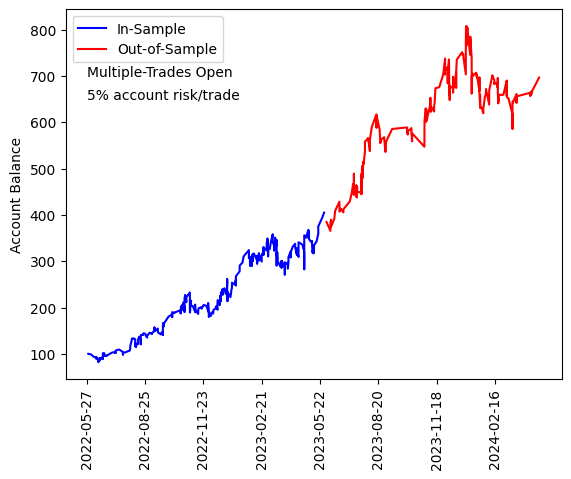

In [368]:

df = df.set_index(pd.to_datetime(df['open_time']))
IS_df = df[df['open_time'] < '2023-05-31']
OS_df = df[df['open_time'] >= '2023-05-31']

df['xlabels'] = df['open_time'].apply(lambda x: x[:10])

xdates = pd.date_range(start = df.index.min(), end = df.index.max(), freq = 'D')


plt.plot(pd.to_datetime(IS_df['close_time']),IS_df['account_balance(t)'],label='In-Sample',color = 'blue')
plt.plot(pd.to_datetime(OS_df['open_time']),OS_df['account_balance(t)'],label='Out-of-Sample',color = 'red')
plt.xticks(ticks = xdates[::90],labels = xdates[::90].date, rotation = 90)
plt.ylabel('Account Balance')
plt.text(xdates[0], 700, 'Multiple-Trades Open')
plt.text(xdates[0],650,'5% account risk/trade')
plt.legend()

In [369]:
df

,strat_id,instrument,open_time,open_price,close_time,close_price,dir,size,PnL,account_balance(t),open_time_fmt,time_in_trade,xlabels
open_time,,,,,,,,,,,,,
2022-05-27 13:05:00+00:00,2,C:USDJPY,2022-05-27 13:05:00+00:00,126.990825,2022-05-29 21:00:00+00:00,126.993175,-1,4.955401,-0.011643,99.988357,13:05:00,55.916667,2022-05-27
2022-05-27 13:40:00+00:00,2,C:USDJPY,2022-05-27 13:40:00+00:00,127.004175,2022-05-29 21:00:00+00:00,126.986825,1,4.995005,-0.086662,99.901695,13:40:00,55.333333,2022-05-27
2022-05-27 13:45:00+00:00,2,C:USDJPY,2022-05-27 13:45:00+00:00,126.950826,2022-05-29 21:00:00+00:00,126.993175,-1,4.766444,-0.201852,99.699842,13:45:00,55.250000,2022-05-27
2022-06-01 15:45:00+00:00,2,C:USDJPY,2022-06-01 15:45:00+00:00,130.036251,2022-06-03 07:45:00+00:00,129.851754,1,4.835104,-0.892063,98.807779,15:45:00,40.000000,2022-06-01
2022-06-06 19:05:00+00:00,2,C:USDJPY,2022-06-06 19:05:00+00:00,131.945701,2022-06-07 06:15:00+00:00,133.000000,-1,4.714112,-4.970082,93.837697,19:05:00,11.166667,2022-06-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-11 13:40:00+00:00,2,C:USDJPY,2024-04-11 13:40:00+00:00,153.017825,2024-04-14 22:00:00+00:00,153.184170,1,32.474051,5.401894,662.142170,13:40:00,80.333333,2024-04-11
2024-04-12 13:40:00+00:00,2,C:USDJPY,2024-04-12 13:40:00+00:00,153.045826,2024-04-14 22:00:00+00:00,153.184170,1,31.513258,4.359678,666.501848,13:40:00,56.333333,2024-04-12
2024-04-12 13:50:00+00:00,2,C:USDJPY,2024-04-12 13:50:00+00:00,152.972176,2024-04-14 22:00:00+00:00,153.191830,-1,32.066122,-7.043455,659.458393,13:50:00,56.166667,2024-04-12


In [370]:
df['date'] =  pd.to_datetime(df['open_time']).dt.date
df['week_no'] = (pd.to_datetime(df['open_time']).dt.isocalendar()['week'])
df['month'] = (pd.to_datetime(df['open_time']).dt.month)
df['year'] = (pd.to_datetime(df['open_time']).dt.year)

In [371]:
# risk-return statistics
index = ['Daily', 'Weekly','Monthly']
columns = ['maxDD','Sharpe','E_returns', 'CumGrowthRate', 'vol']

perfomance_summary = pd.DataFrame(index = index, columns = columns)

In [372]:
s = ['date','week_no','month']
t = {'date':'Daily', 'week_no':'Weekly', 'month':'Monthly'}

#Daily
stats = df.groupby(by = 'date' ).agg(PnL = ('PnL','first'),\
                                        start_acc = ('account_balance(t)','first'),\
                                        end_acc = ('account_balance(t)','last'))
# print(stats)
    
stats['start_acc'] = stats['start_acc'] - stats['PnL']
stats['abs_return_pct'] = (stats['end_acc'] - stats['start_acc'])/stats['start_acc']

perfomance_summary.loc['Daily', 'maxDD'] = stats['abs_return_pct'].min()
perfomance_summary.loc['Daily', 'E_returns'] = stats['abs_return_pct'].mean()
perfomance_summary.loc['Daily', 'vol'] = stats['abs_return_pct'].std()



#Weekly
stats = df.groupby(by = ['year','week_no'] ).agg(PnL = ('PnL','first'),\
                                        start_acc = ('account_balance(t)','first'),\
                                        end_acc = ('account_balance(t)','last'))


stats['start_acc'] = stats['start_acc'] - stats['PnL']
stats['abs_return_pct'] = (stats['end_acc'] - stats['start_acc'])/stats['start_acc']

perfomance_summary.loc['Weekly', 'maxDD'] = stats['abs_return_pct'].min()
perfomance_summary.loc['Weekly', 'E_returns'] = stats['abs_return_pct'].mean()
perfomance_summary.loc['Weekly', 'vol'] = stats['abs_return_pct'].std()



#Monthly
stats = df.groupby(by = ['year','month'] ).agg(PnL = ('PnL','first'),\
                                        start_acc = ('account_balance(t)','first'),\
                                        end_acc = ('account_balance(t)','last'))


stats['start_acc'] = stats['start_acc'] - stats['PnL']
stats['abs_return_pct'] = (stats['end_acc'] - stats['start_acc'])/stats['start_acc']


perfomance_summary.loc['Monthly', 'maxDD'] = stats['abs_return_pct'].min()
perfomance_summary.loc['Monthly', 'E_returns'] = stats['abs_return_pct'].mean()
perfomance_summary.loc['Monthly', 'vol'] = stats['abs_return_pct'].std()


# print(stats)

In [373]:
import math as m
dtime = pd.to_datetime(df['open_time'].max()) - pd.to_datetime(df['open_time'].min())
no_day  = dtime.days
no_weeks = no_day/7
no_months = 12*(no_weeks/52)
no_years = no_day/365
df = df.set_index(pd.to_datetime(df['open_time']))

In [374]:
perfomance_summary.loc['Daily','CumGrowthRate'] = (1/(no_day))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])
perfomance_summary.loc['Weekly','CumGrowthRate'] = (1/(no_weeks))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])
perfomance_summary.loc['Monthly','CumGrowthRate'] = (1/(no_months))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])

In [375]:
yearly_ret = (1/(no_years))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])
rfr = 0.04

perfomance_summary.loc['Daily','Sharpe'] = (yearly_ret - rfr)/(m.sqrt(252)*perfomance_summary.loc['Daily','vol'])
perfomance_summary.loc['Weekly','Sharpe'] = (yearly_ret - rfr)/(m.sqrt(52)*perfomance_summary.loc['Weekly','vol'])
perfomance_summary.loc['Monthly','Sharpe'] = (yearly_ret - rfr)/(m.sqrt(12)*perfomance_summary.loc['Monthly','vol'])


In [376]:
perfomance_summary

,maxDD,Sharpe,E_returns,CumGrowthRate,vol
Daily,-0.114603,1.594059,0.008886,0.002782,0.03854
Weekly,-0.117374,1.964777,0.023778,0.019471,0.068835
Monthly,-0.186762,1.853459,0.094243,0.084373,0.151897
